<a href="https://colab.research.google.com/github/saadkiet/SPAM-TEXT-MESSAGES-PROJECT-/blob/master/SPAM_TEXT_MESSAGES(PROJECT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Set up and install

In [0]:
pip install tensorflow-gpu

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


# Step 2 : Importing Dataset

In [0]:
from google.colab import files
data=files.upload()

Saving spam.csv to spam.csv


In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [0]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Step 3 : Data Preprocessing

In [0]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.columns=['labels','Text Messages']

In [0]:
df.head()

,labels,Text Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
df.tail()

,labels,Text Messages
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [0]:
df['Target']=df['labels'].map({'spam':1,'ham':0})

In [0]:
Y=df['Target'].values

In [0]:
X=df['Text Messages']

In [0]:
xtrain,xtest,ytrian,ytest=train_test_split(X,Y,test_size=0.3)

# Step 4 : Tokenization

In [0]:
tk=Tokenizer(num_words=30000) #Initializing Tokenizer

In [0]:
tk.fit_on_texts(xtrain) #Looping through each word

In [0]:
#Converting each word to index
train_seq=tk.texts_to_sequences(xtrain)
test_seq=tk.texts_to_sequences(xtest)

In [0]:
V=len(tk.word_counts)

In [0]:
print(V)

7422


# Step 5 : Padding

In [0]:
train_data=pad_sequences(train_seq)

In [0]:
train_data.shape

(3900, 189)

In [0]:
test_data=pad_sequences(test_seq,maxlen=189)

# Step : 6 Building RNN Model

In [0]:
D=20

i=Input(shape=(189,))
x=Embedding(V+1,D)(i)
x=LSTM(128,return_sequences=True,activation='tanh')(x)

x=GlobalMaxPooling1D()(x)
x=Dense(1,activation='sigmoid')(x)

model=Model(i,x)

In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 189)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 189, 20)           148460    
_________________________________________________________________
lstm (LSTM)                  (None, 189, 128)          76288     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 224,877
Trainable params: 224,877
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [0]:
print('Training model...')
r = model.fit(
  train_data,
  ytrian,
  epochs=5,
  validation_data=(test_data, ytest)
)

Training model...
Epoch 1/5
122/122 [==============================] - 26s 213ms/step - loss: 0.4117 - accuracy: 0.8621 - val_loss: 0.3997 - val_accuracy: 0.8624
Epoch 2/5
122/122 [==============================] - 25s 208ms/step - loss: 0.2515 - accuracy: 0.9110 - val_loss: 0.0972 - val_accuracy: 0.9749
Epoch 3/5
122/122 [==============================] - 26s 211ms/step - loss: 0.0508 - accuracy: 0.9890 - val_loss: 0.0600 - val_accuracy: 0.9839
Epoch 4/5
122/122 [==============================] - 25s 209ms/step - loss: 0.0236 - accuracy: 0.9949 - val_loss: 0.0463 - val_accuracy: 0.9880
Epoch 5/5
122/122 [==============================] - 25s 209ms/step - loss: 0.0144 - accuracy: 0.9972 - val_loss: 0.0523 - val_accuracy: 0.9880


# Step 7 : Model Evaluation

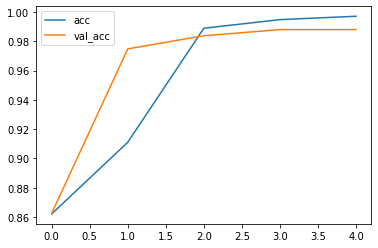

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

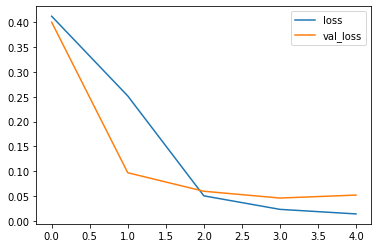

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()